# Importing the required libraries 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

# Displaying the first image of the dataset to visualise the data

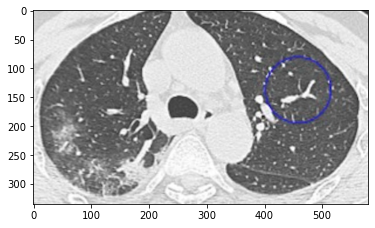

(335, 580, 3)


In [5]:
DATA_DIR = "C:/Users/Haniel/Desktop/Programming/Datasets"
CATEGORIES = ["CT_COVID","CT_NonCOVID"]
for category in CATEGORIES:
    path = os.path.join(DATA_DIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break
print(img_array.shape)

# Resizing the data

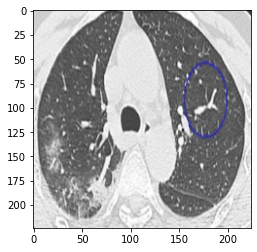

In [6]:
new_array = cv2.resize(img_array, (224,224))
plt.imshow(new_array)
plt.show()

# Creating a training set using the images and their respective labels

In [7]:
training_data = []

def create_training_set():
    for category in CATEGORIES:
        path = os.path.join(DATA_DIR, category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img))
            new_array = cv2.resize(img_array,(224,224))
            training_data.append([new_array,CATEGORIES.index(category)])
create_training_set()

# Shufflling the data to avoid bias 

In [8]:
random.shuffle(training_data)
print(len(training_data))

746


# Initialising variables to hold the features and labels

In [9]:
X = []
y = []

# Traversing through the training data to seperate the features and labels and store them in seperate variables X and y

In [10]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, 224, 224, 3)
y = np.array(y)

# Creating a sequential keras model with 3 hidden layers and an output layer to train the data

In [11]:

model = Sequential()

model.add(Conv2D(64, (3,3), input_shape = [224,224] + [3]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

model.fit(X,y,batch_size=10,validation_split=0.1, epochs = 10)

Epoch 1/10
68/68 [==============================] - 23s 338ms/step - loss: 286.9177 - accuracy: 0.5648 - val_loss: 1.0590 - val_accuracy: 0.6533
Epoch 2/10
68/68 [==============================] - 23s 338ms/step - loss: 0.6433 - accuracy: 0.6393 - val_loss: 1.0242 - val_accuracy: 0.5867
Epoch 3/10
68/68 [==============================] - 24s 349ms/step - loss: 0.5416 - accuracy: 0.6796 - val_loss: 1.1080 - val_accuracy: 0.6133
Epoch 4/10
68/68 [==============================] - 25s 361ms/step - loss: 0.4906 - accuracy: 0.7198 - val_loss: 0.9938 - val_accuracy: 0.6533
Epoch 5/10
68/68 [==============================] - 24s 351ms/step - loss: 0.4437 - accuracy: 0.7496 - val_loss: 1.1565 - val_accuracy: 0.6400
Epoch 6/10
68/68 [==============================] - 25s 369ms/step - loss: 0.4135 - accuracy: 0.7779 - val_loss: 1.0700 - val_accuracy: 0.6133
Epoch 7/10
68/68 [==============================] - 28s 418ms/step - loss: 0.3643 - accuracy: 0.8122 - val_loss: 1.1898 - val_accuracy: 0.68